# Regressão 01 - tarefa 01

## 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
# Importando os dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


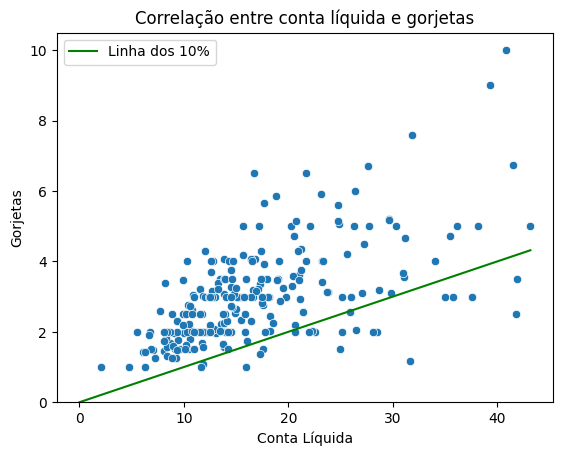

In [3]:
# Selecionando os dados de interesse
df_copy = tips[tips['tip_pct']<.5].copy()

# Gráfico de dispersão
sns.scatterplot(y='tip', x='net_bill', data=df_copy)

# Gerando dados para a linha dos 10%
x = np.linspace(0,df_copy['net_bill'].max(),len(df_copy))
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-g', label='Linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

### Conclusão

- Observa-se que a linha de tendência de gorjetas como 10% da conta está abaixo da maioria dos dados, porém, essa apresenta um angulo (coeficiente angular) condizente com o conjunto de dados.



---



## 2 Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [4]:
'''
Modelo de Regressão Linear Simples com a variável explicativa conta líquida
(net_bill) e variável dependente porcentagem da gorgeta (tip_pct)
'''
reg = smf.ols('tip_pct ~ net_bill', data = df_copy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           2.41e-25
Time:                        09:12:44   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

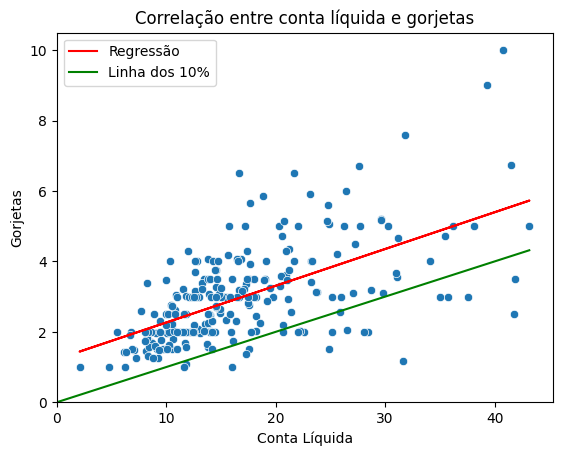

In [5]:
# Gráfico de dispersão
sns.scatterplot(y='tip_pct', x='net_bill', data=df_copy)

# Gerando dados para a linha dos 10%
x_obs = df_copy['net_bill']
y_pred = reg.predict(x_obs)

# Plotando a linha dos 10%
plt.plot(x_obs, y_pred, '-r', label='Regressão')
# plt.plot(x, y, '-g', label='Linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlim(left = 0)
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas em Porcentagem")

plt.show()

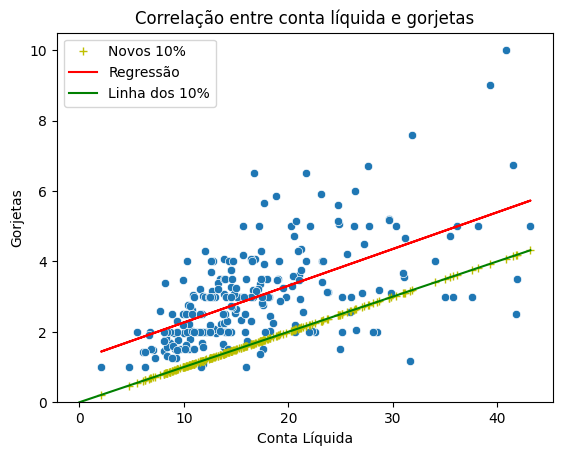

In [6]:
# Gráfico de dispersão
df_copy = tips[tips['tip_pct']<.5].copy()

sns.scatterplot(y='tip', x='net_bill', data=df_copy)

# Gerando dados para a linha dos 10%
y_dez = .1*x_obs

# Plotando a linha dos 10%
plt.plot(x_obs, y_dez, '+y', label='Novos 10%')
plt.plot(x_obs, y_pred, '-r', label='Regressão')
plt.plot(x, y, '-g', label='Linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

In [7]:
# Instanciando objeto com os valores de gorjeta observados
y_obs = df_copy['tip'].values
y_obs[:5]

array([1.01, 1.66, 3.5 , 3.31, 3.61])

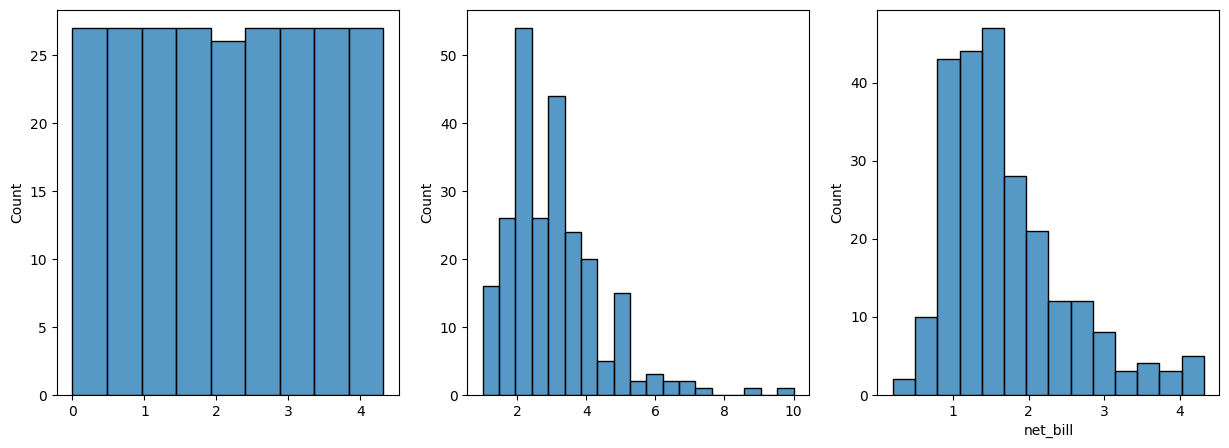

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.histplot(y, ax=ax[0])
sns.histplot(y_obs, ax=ax[1])
sns.histplot(y_dez, ax=ax[2])
plt.show()

### Conclusão



---



## 3 Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [9]:
def calcula_r_quad(y_obs: list, y_pred: list) -> tuple:
  '''
  Função que recebe dois conjuntso de valores e calcula o R² entre eles. Retorna
  uma tupla com o R² e uma DataFrame com os valores.
  :param y_obs (list): Conjunto de valores observados
  :param y_pred (list): Conjunto de valores preditos
  :return r_quad (float): R²
  :return df (pd.DataFrame): DataFrame com os clculos
  '''
  df = pd.DataFrame()
  df['y_obs'] = y_obs
  df['sqt'] = (y_obs-np.mean(y_obs))**2
  df['y_pred'] = y_pred
  df['y-estima'] = y_obs-y_pred
  df['sqm'] = df['y-estima']**2
  r_quad = 1 - (df['sqm'].sum()/df['sqt'].sum())
  return (r_quad, df)

In [10]:
print(f"R² 10%: {calcula_r_quad(y_pred=y, y_obs=y_obs)[0]:.3f}")
print(f"R² novos 10%: {calcula_r_quad(y_pred=y_dez, y_obs=y_obs)[0]:.3f}")
print(f"R² Regressão: {calcula_r_quad(y_pred=y_pred, y_obs=y_obs)[0]:.3f}")

R² 10%: -1.247
R² novos 10%: -0.517
R² Regressão: 0.366


In [11]:
print(f"R² 10%: {r2_score(y_true=y_obs, y_pred=y):.3f}")
print(f"R² novos 10%: {r2_score(y_true=y_obs, y_pred=y_dez):.3f}")
print(f"R² Regressão: {r2_score(y_true=y_obs, y_pred=y_pred):.3f}")

R² 10%: -1.247
R² novos 10%: -0.521
R² Regressão: 0.364


In [12]:
_, df_test = calcula_r_quad(y_pred=y, y_obs=y_obs)

print("10%:")
sqm = df_test.sqm.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqm:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqm / sqt):.3f}")

10%:
Soma dos Quadrados dos Resíduos: 1032.640
Soma Total dos Quadrados: 459.538
R²: -1.247


In [13]:
_, df_test = calcula_r_quad(y_pred=y_dez, y_obs=y_obs)

print("Novos 10%:")
sqm = df_test.sqm.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqm:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqm / sqt):.3f}")

Novos 10%:
Soma dos Quadrados dos Resíduos: 697.069
Soma Total dos Quadrados: 459.538
R²: -0.517


In [14]:
_, df_test = calcula_r_quad(y_pred=y_pred, y_obs=y_obs)

print("Regressão")
sqm = df_test.sqm.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqm:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqm / sqt):.3f}")

Regressão
Soma dos Quadrados dos Resíduos: 291.146
Soma Total dos Quadrados: 459.538
R²: 0.366


### Conclusão

- O R² pode ser usado para comparar os modelos.
- Foram determinados 3 modelos:
 <br>-- O primeiro com 10% dos valores em uma distribuição linear com mínimo de 0 e máximo igual ao máximo da conta dos clientes.
 <br>-- Um segundo, com 10% do valor das contas.
 <br>-- E um terceiro modelo com uma Regressão Linear Simples.
 <br>
 <br>
- O primeiro moelo teve o pior desempenho, com um valor de R² de -1,247. Isso significa que a Soma dos Quadrados dos Resíduos (SQM) foi maior (1032) do que a Soma Total dos Quadrados (SQT), de 459.
- Já o segundo modelo teve um melhor R² que o primeiro, -0,51, porém ainda negativo, com SQM de 697.
- O terceiro modelo, de Regressão Linear Simples, teve o melhor R², de 0,366, com SQM de 291.
<br>
<br>
É interessante observar que o R² não deveria ser negativo, porém, isso indica que usar apenas a média como modelo seria melhor do que os dois modelos de 10%.



---



## 4 Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [15]:
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [16]:
reg = smf.ols('tip ~ tip_pct', data = df_copy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     32.62
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           3.31e-08
Time:                        09:12:46   Log-Likelihood:                -405.56
No. Observations:                 242   AIC:                             815.1
Df Residuals:                     240   BIC:                             822.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6546      0.247      6.685      0.000       1.167       2.142
tip_pct        6.9775      1.222      5.711      0.000       4.571       9.384
==============================================================================
Omnibus:                       78.172   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.253
Skew:                           1.369   Prob(JB):                     2.04e-54
Kurtosis:                       7.127   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

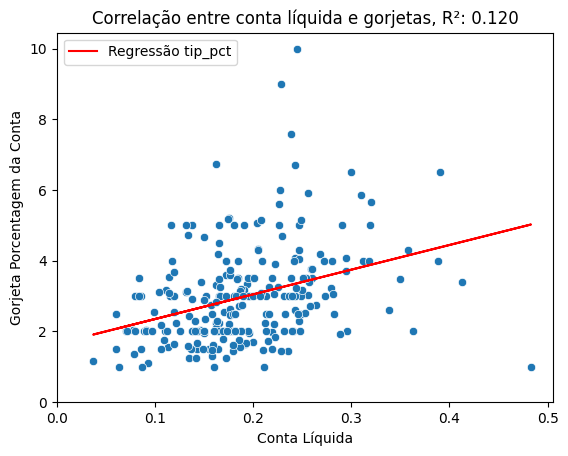

In [17]:
# Gráfico de dispersão
sns.scatterplot(y='tip', x='tip_pct', data=df_copy)

# Gerando dados para a linha dos 10%
x_obs = df_copy['tip_pct']
y_pred = reg.predict(x_obs)
y_obs = df_copy['tip']

# Plotando a linha de Regressão
plt.plot(x_obs, y_pred, '-r', label='Regressão tip_pct')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.legend(loc="upper left")
r_square = calcula_r_quad(y_pred=y_pred, y_obs=y_obs)[0]
plt.title(f"Correlação entre conta líquida e gorjetas, R²: {r_square:.3f}")
plt.xlim(left = 0)
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjeta Porcentagem da Conta")

plt.show()

In [18]:
y_tip = df_copy['tip_pct'] * df_copy['net_bill']
y_tip[:4]

0    1.01
1    1.66
2    3.50
3    3.31
dtype: float64

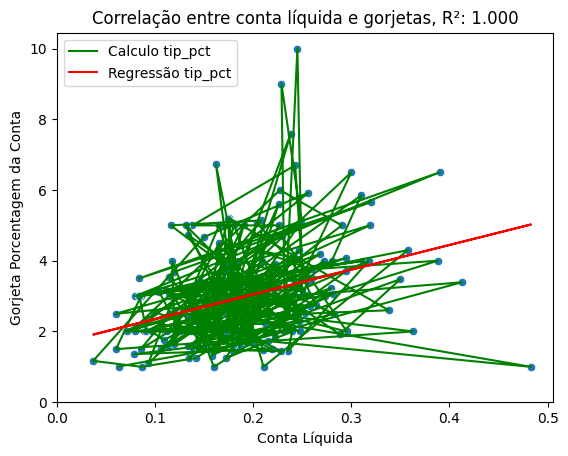

In [19]:
 # Gráfico de dispersão
sns.scatterplot(y='tip', x='tip_pct', data=df_copy)

# Plotando a linha de Regressão
plt.plot(x_obs, y_tip, '-g', label='Calculo tip_pct')
plt.plot(x_obs, y_pred, '-r', label='Regressão tip_pct')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.legend(loc="upper left")
r_square = calcula_r_quad(y_pred=y_tip, y_obs=y_obs)[0]
plt.title(f"Correlação entre conta líquida e gorjetas, R²: {r_square:.3f}")
plt.xlim(left = 0)
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjeta Porcentagem da Conta")

plt.show()

## Conclusão

- A gorjeta `tip` é uma porcentagem da conta, portanto, quando multiplico a conta líquida `net_bill` pela porcentagem da gorgeta `tip_pct` eu obtenho a própria gorgeta `tip`. Assim, o modelo de multiplicaão é "perfeito", com R² = 1, portanto sem resíduos.
- Já o modelo que usou a porcentagem da gorgeta `tip_pct` para obter a própria gorjeta `tip` teve um desempenho abaixo dos demais modelos, R² = 0,12. Aqui, o baixo coeficiente de determinação pode estar relacionado as variáveis escolhidas, pois sabemos que a gorgeta é uma porcentagem da conta e não dela mesmo.